In [1]:
import os
from datetime import datetime

import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
base_path = "./"
for data in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, data)):
        for file in os.listdir(os.path.join(base_path, data)):
            name, ext = file.rsplit(os.extsep, maxsplit=1)
            if ext == 'csv':
                csv_data = pd.read_csv(os.path.join(base_path, data, file), sep='\t')
                break
        break

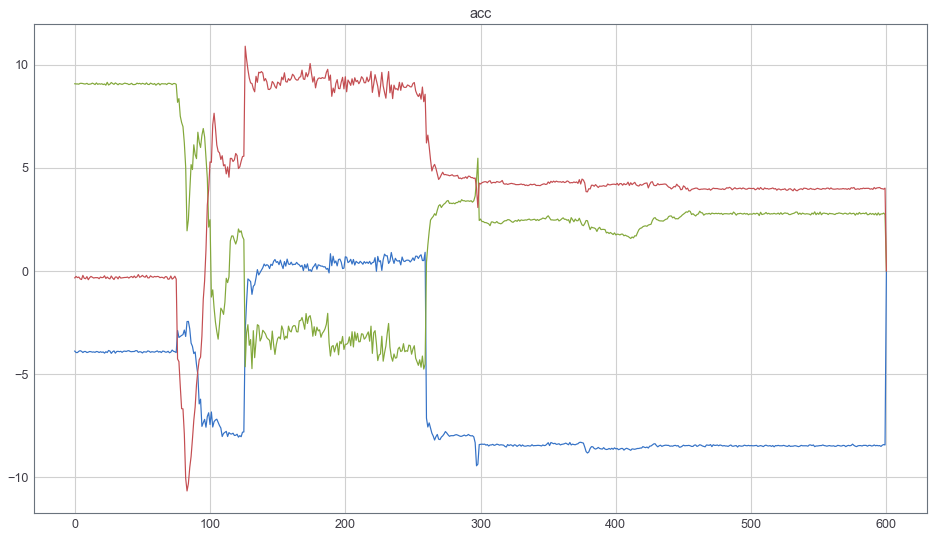

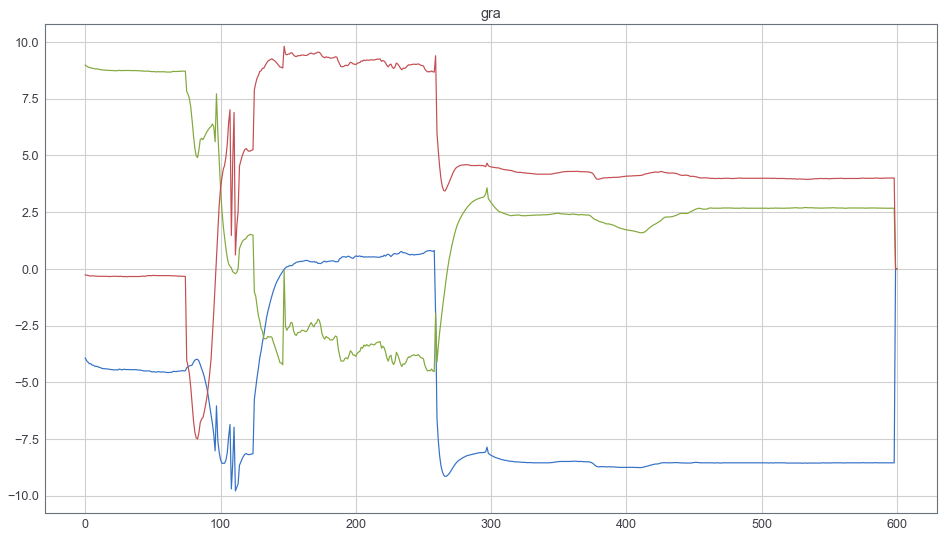

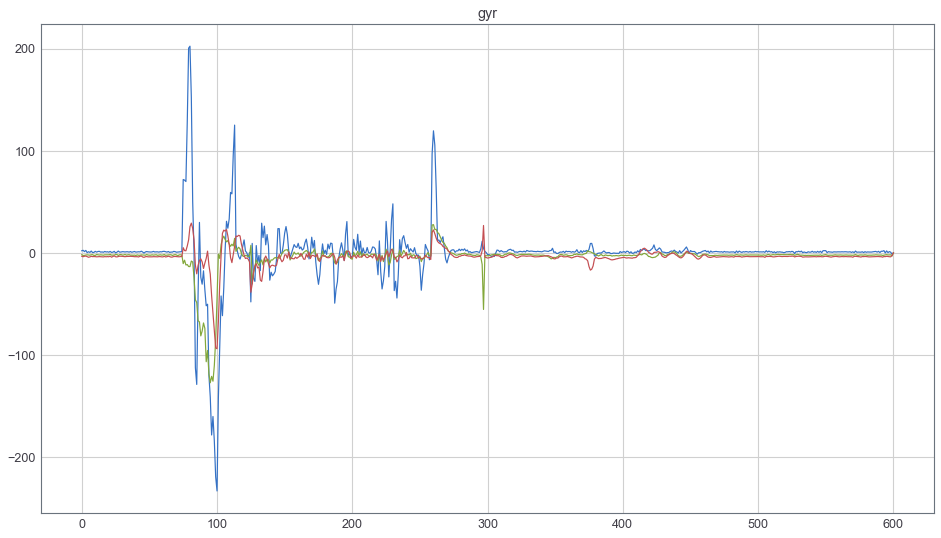

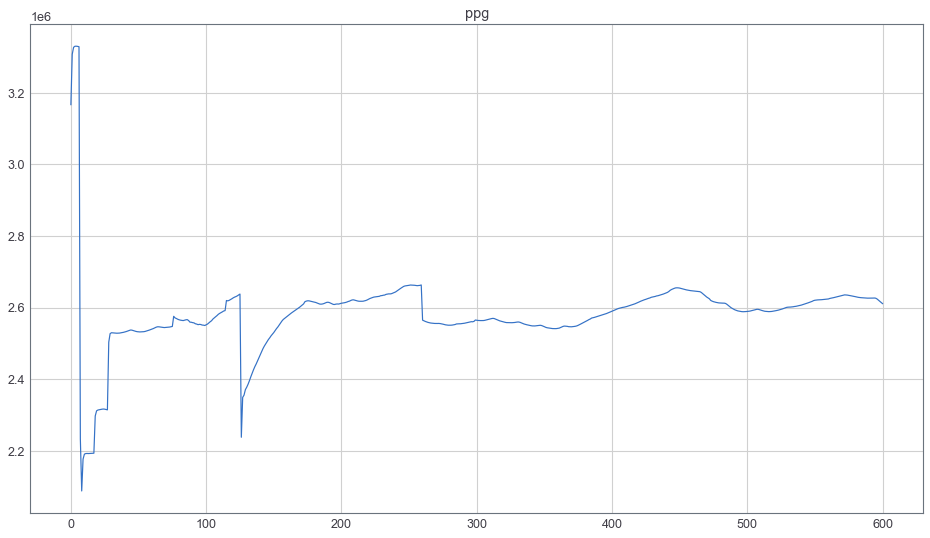

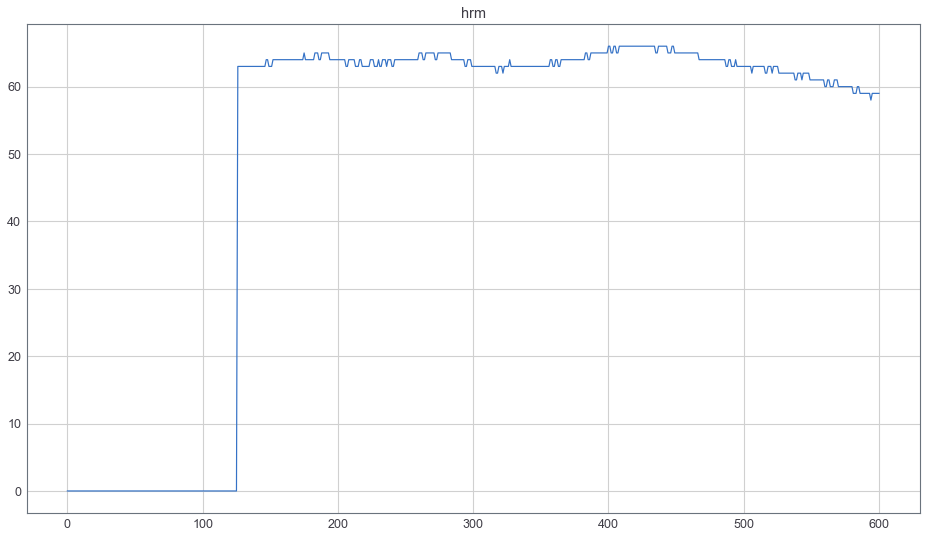

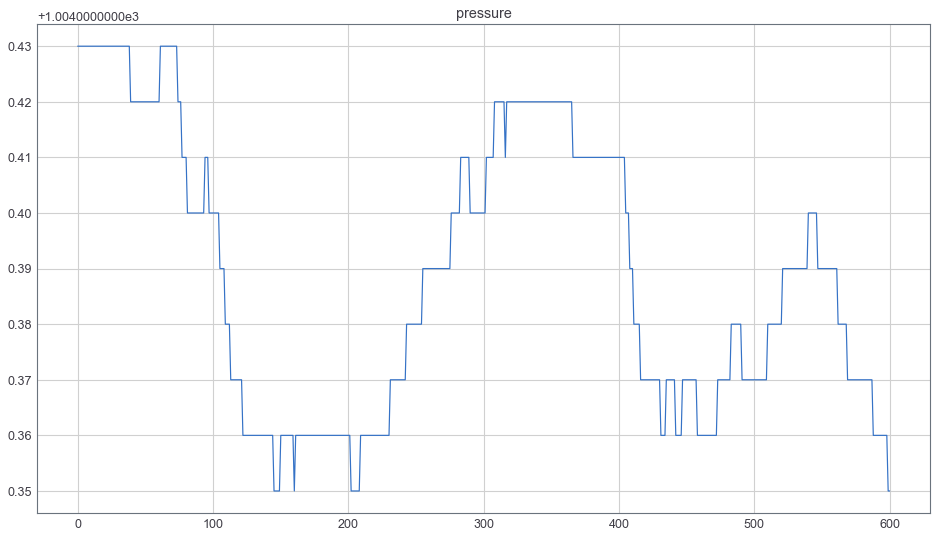

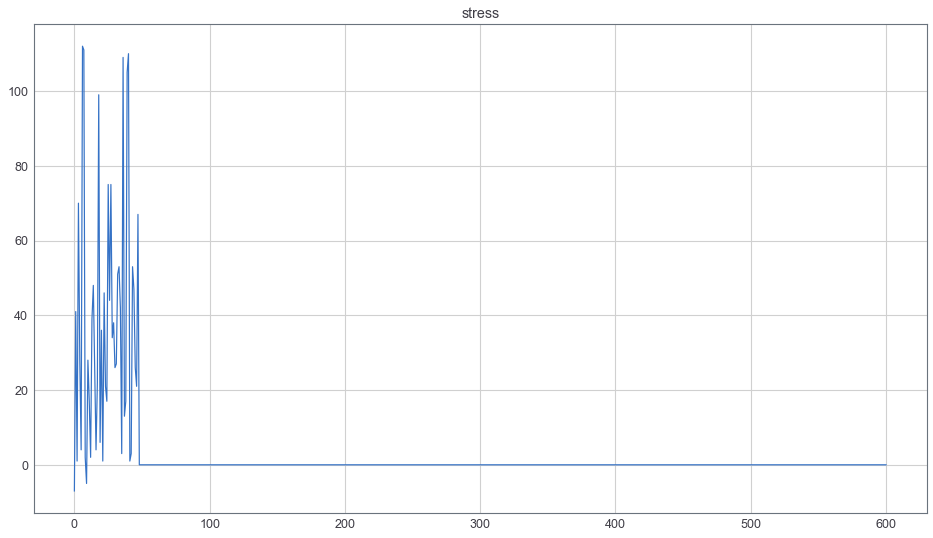

In [4]:
base_path = r'.\pers2570-2020-05-30-02-12-48'
figsize = (16, 9)

for csv in os.listdir(base_path):
    df = pd.read_csv(base_path + os.sep + csv, sep='\t')
    for type_ in ['acc', 'gra', 'gyr']:
        plt.figure(figsize=figsize)
        plt.title(type_)
        for i in ['x', 'y', 'z']:
            if type_ + i == 'gyrz':
                type_ = 'gr'
            x, y = zip(*enumerate(df[type_ + i]))
            plt.plot(x, y, label=i)
        plt.savefig(type_+'.png')
        plt.show()
        
    for col in df.columns[1:]:
        if 'acc' in col:
            pass
        elif 'gra' in col:
            pass
        elif 'gyr' in col or col == 'grz':
            pass
        else:
            plt.figure(figsize=figsize)
            plt.title(col)
            x, y = zip(*enumerate(df[col]))
            plt.plot(x, y)
            plt.savefig(col + ".png")
            plt.show()
    break

In [5]:
def beauty_draw(data, n, figsize=(16, 9), markersize=1):
    chunk = len(data) // n
    for i in range(n):
        plt.figure(figsize=figsize)
        plt.plot(*zip(*enumerate(data[i*chunk:(i + 1)*(chunk)])), marker='o', markersize=markersize)
        plt.show()

In [66]:
def pall_beauty_draw(datas, labels, n, figsize=(16, 9), markersize=1):
    colors = ['r', 'g', 'b']
    chunk = len(datas[0]) // n
    for i in range(n):
        plt.figure(figsize=figsize)
        for c, data in enumerate(datas):
            if 'int' in str(type(data[0])).lower() or 'float' in str(type(data[0])).lower():
                plt.plot(*zip(*enumerate(data[i*chunk:(i + 1)*(chunk)])), marker='o', markersize=markersize, color=colors[c], label=labels[c])
            else:
                plt.plot(data[i*chunk:(i + 1)*(chunk),0], data[i*chunk:(i + 1)*(chunk),1], marker='o', markersize=markersize, color=colors[c], label=labels[c])
        plt.legend()
        plt.show()

In [7]:
def overview_data(timestamp, data, filter=False, freq=6, cutout=False):
    count = 0
    skews, kurtosises, stds = [], [], []
    if filter:
        b, a = sm.signal.build_filter(frequency=freq, sample_rate=freq, filter_type='low', filter_order=4)
        filtered_data = sm.signal.filter_signal(b, a, signal=data)
    if cutout:
        for i in range(0, len(data), freq):
            period_start = i
            period_end = i + freq
            period = data[period_start:period_end + 1]
            skew = scipy.stats.skew(period)
            kurtosis = scipy.stats.kurtosis(period)
            std = np.std(period)
            skews.append(skew)
            kurtosises.append(kurtosis)
            stds.append(std)
    fig, axs = plt.subplots(4, 1, figsize=(16, 16))
    for idx, value in enumerate(['data', 'skews', 'kurtosises', 'stds']):
        axs[idx].plot(eval(value))
        axs[idx].set_title(value)
    plt.show()
    return skews, kurtosises, stds

In [8]:
def detect_extreme(timestamp, data, filter=False, freq=6, p=0.1):
    count = 0
    skews, kurtosises, stds = [], [], []
    timestamp = np.array(timestamp)
    tp = []
    if filter:
        b, a = sm.signal.build_filter(frequency=freq, sample_rate=freq, filter_type='low', filter_order=4)
        filtered_data = sm.signal.filter_signal(b, a, signal=data)
    for i in range(0, len(data), freq):
        period = data[i : i+freq+1]
        skew = scipy.stats.skew(period)
        kurtosis = scipy.stats.kurtosis(period)
        std = np.std(period)
        skews.append(skew)
        kurtosises.append(kurtosis)
        stds.append(std)
        tp.append((i, i+freq))
    tp = [i for _, i in sorted(zip(stds, tp), key=lambda pair: pair[0], reverse=True)][:int(len(tp) * p)]
    plt.figure(figsize=(12, 12))
    plt.plot(timestamp, data)
    for i in tp:
        plt.plot(timestamp[i[0]:i[1] + 1], data[i[0]:i[1] + 1], color='red')
    plt.show()

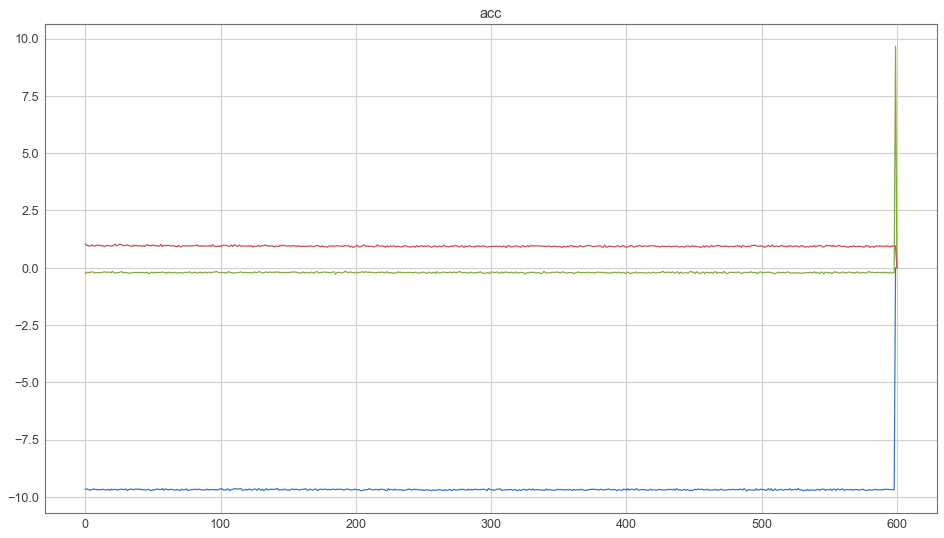

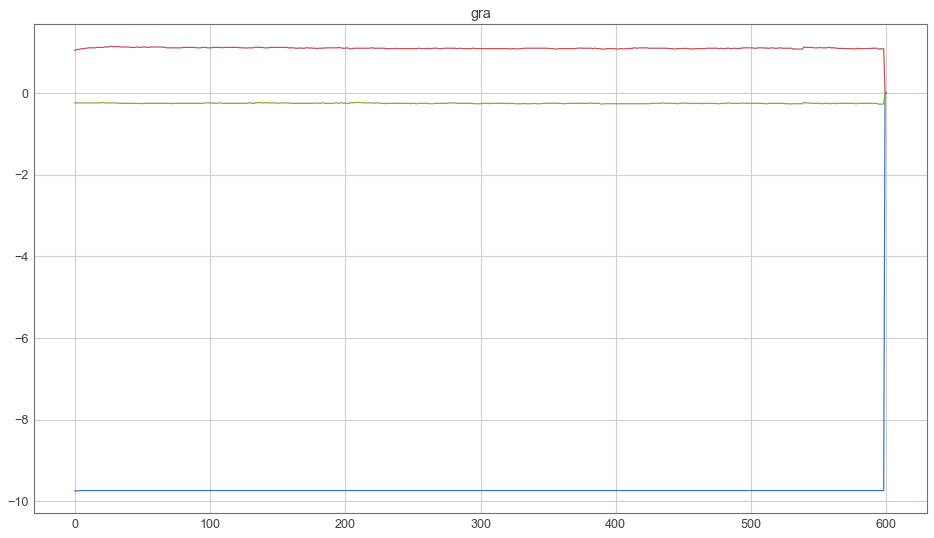

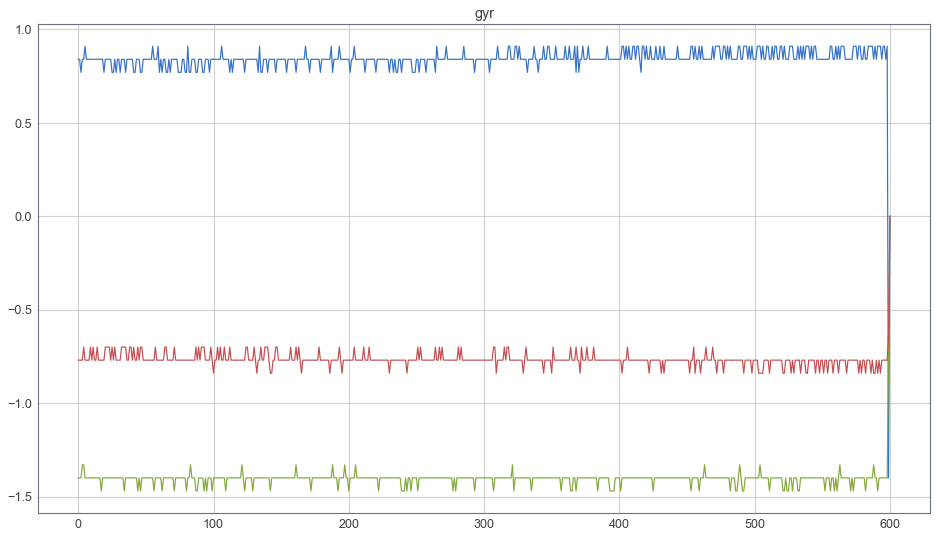

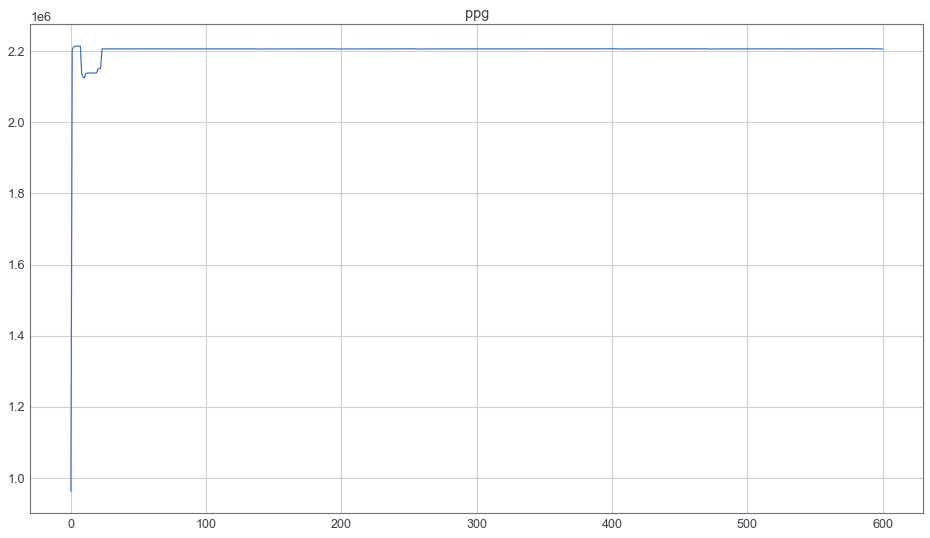

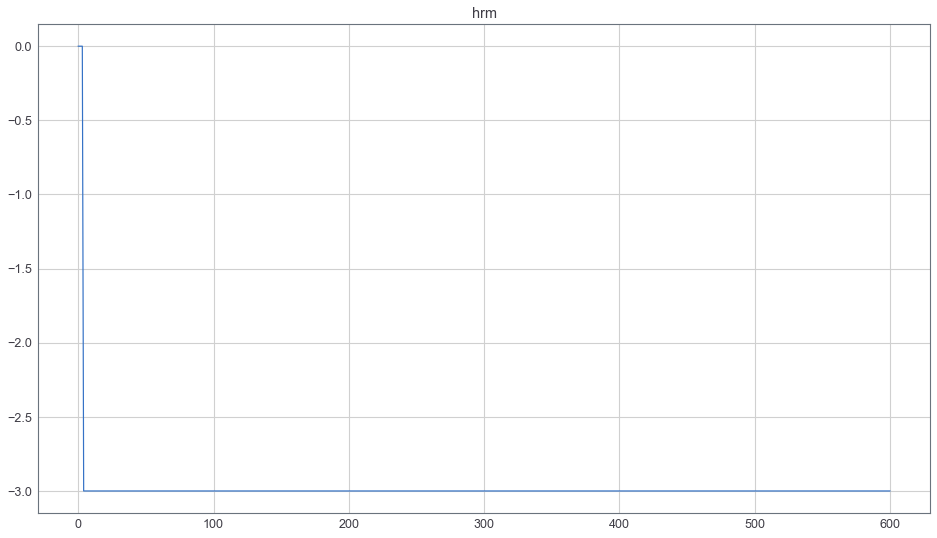

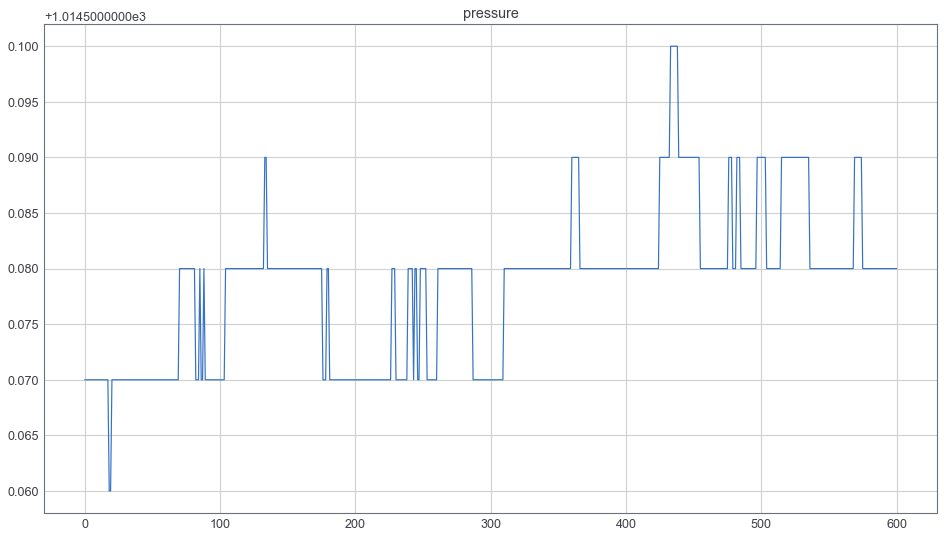

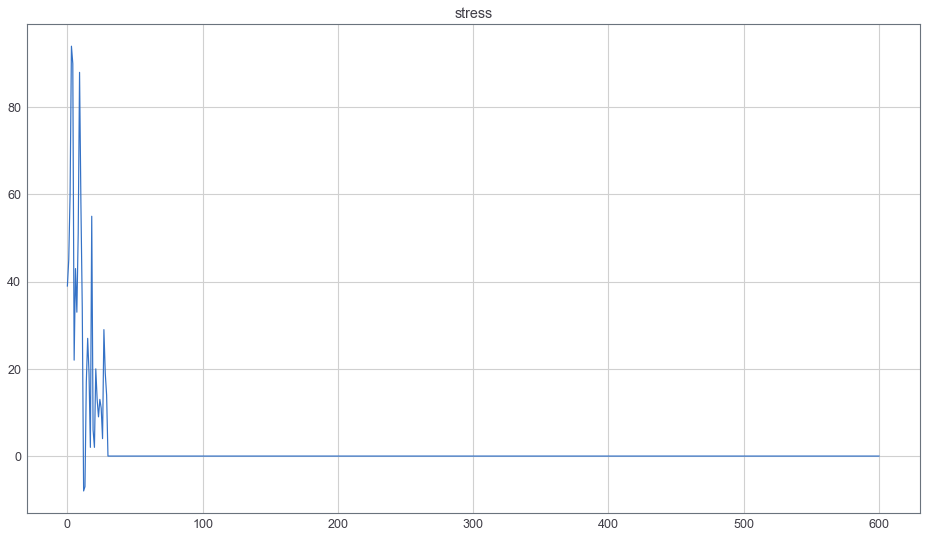

In [9]:
base_path = r'.\sample'
figsize = (16, 9)
for csv in os.listdir(base_path):
    df = pd.read_csv(base_path + os.sep + csv, sep='\t')
    for _type in ['acc', 'gra', 'gyr']:
        plt.figure(figsize=figsize)
        plt.title(_type)
        for i in ['x', 'y', 'z']:
            if _type + i == 'gyrz':
                _type = 'gr'
            x, y = zip(*enumerate(df[_type + i]))
            plt.plot(x, y, label=i)
        plt.savefig(_type+'.png')
        plt.show()
        
    for col in df.columns[1:]:
        if 'acc' in col:
            pass
        elif 'gra' in col:
            pass
        elif 'gyr' in col or col == 'grz':
            pass
        else:
            plt.figure(figsize=figsize)
            plt.title(col)
            x, y = zip(*enumerate(df[col]))
            plt.plot(x, y)
            plt.savefig(col + ".png")
            plt.show()
    break

In [10]:
df = pd.read_csv(r'.\sample\data_202001210848.csv', sep='\t')

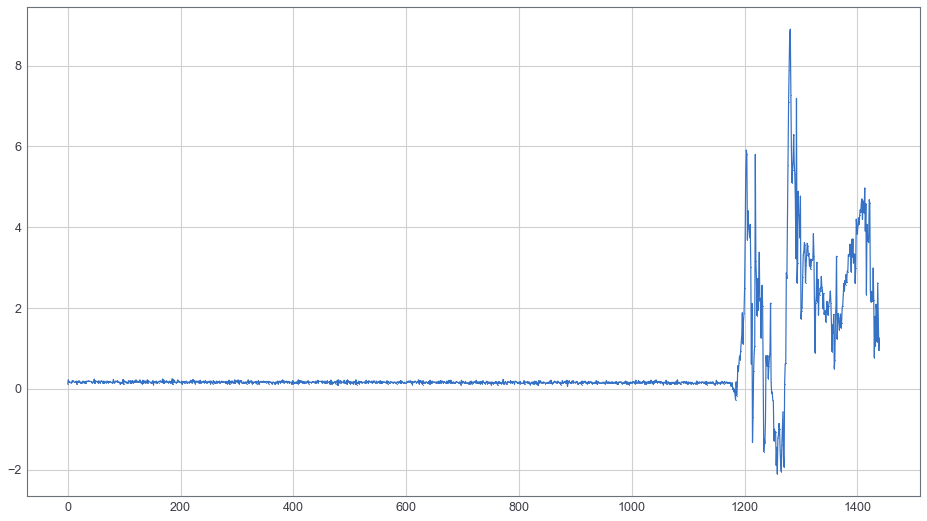

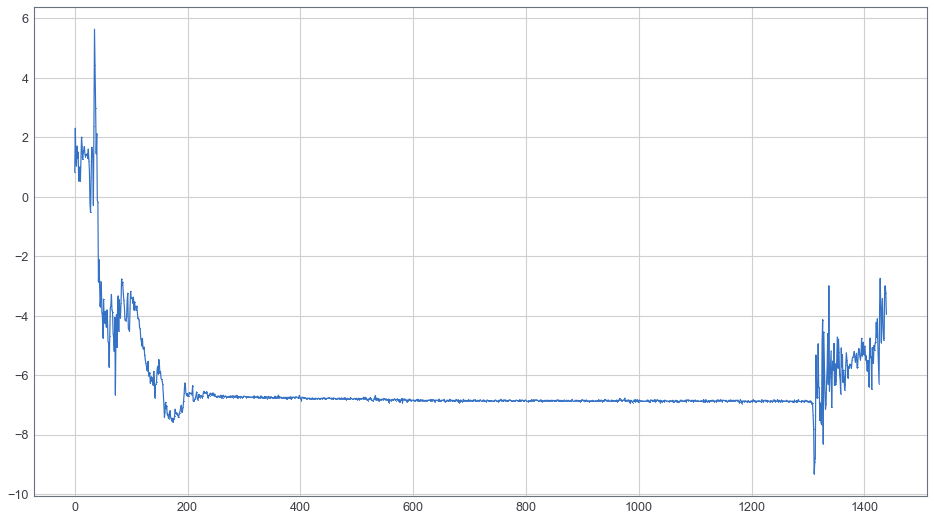

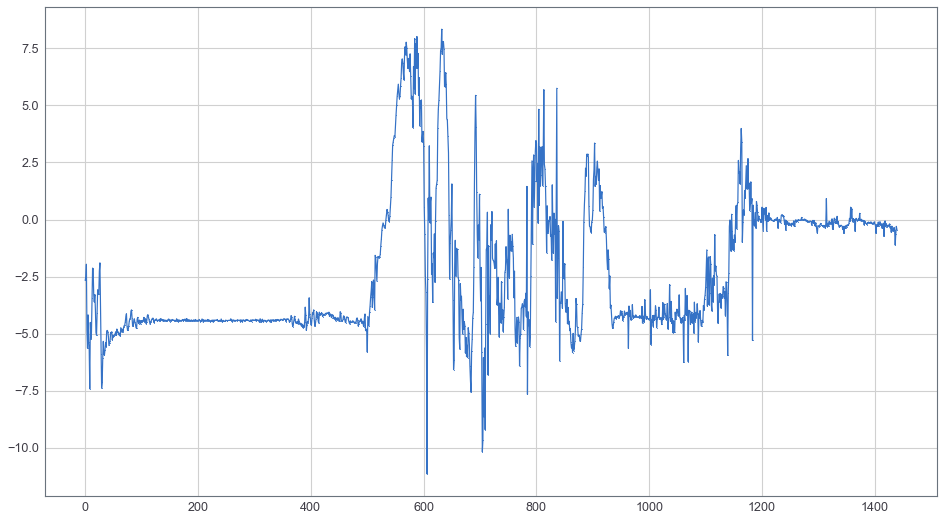

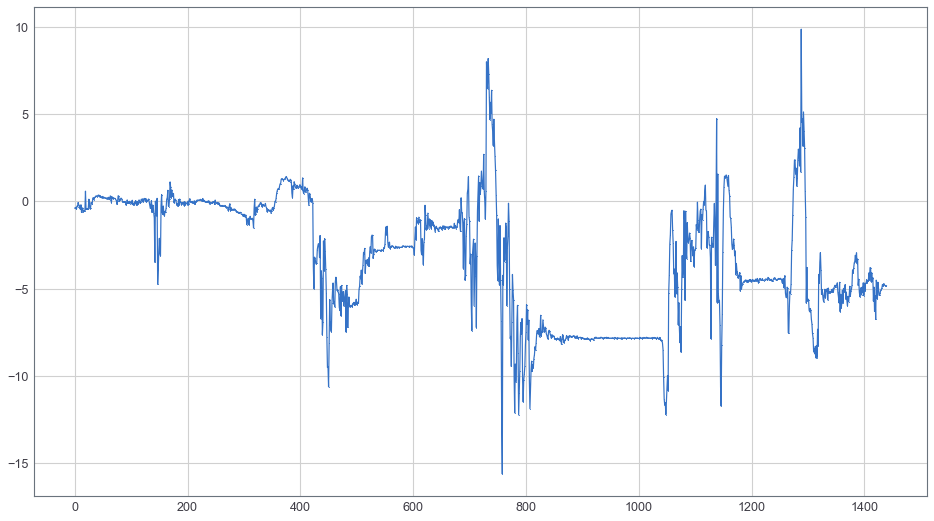

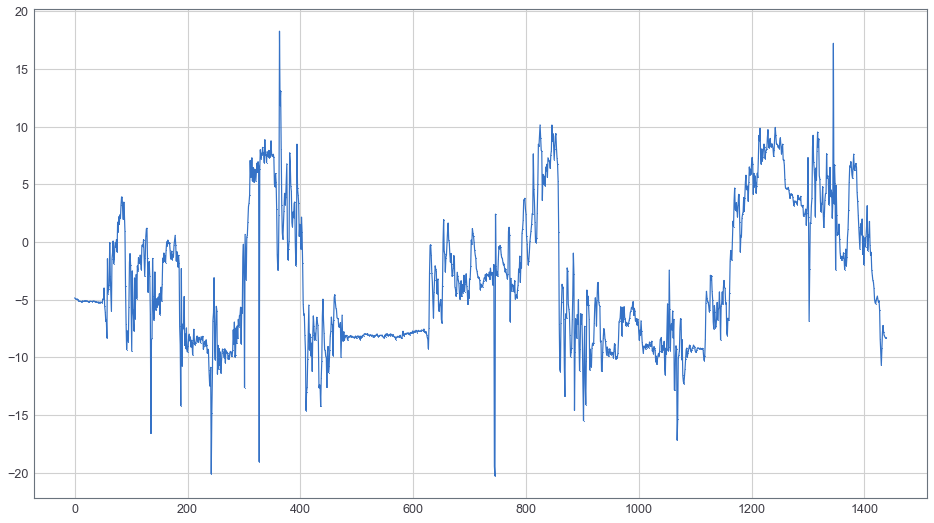

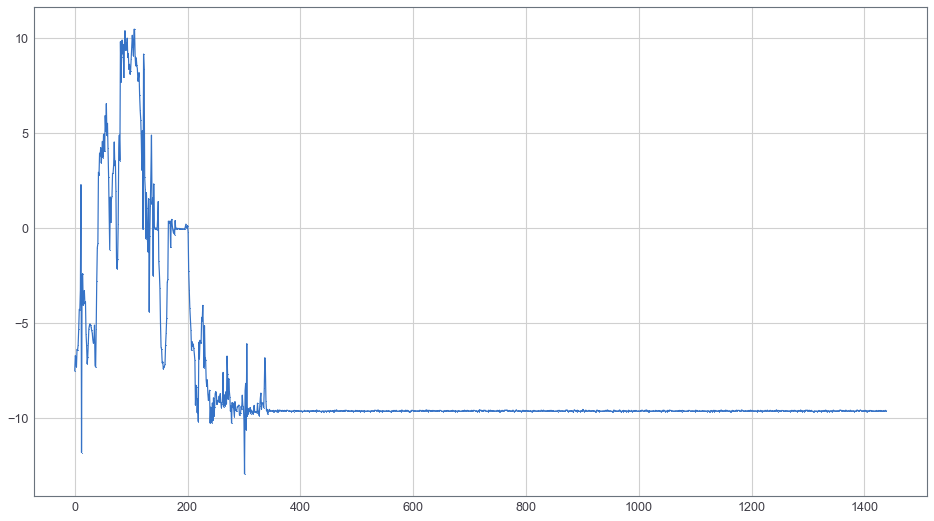

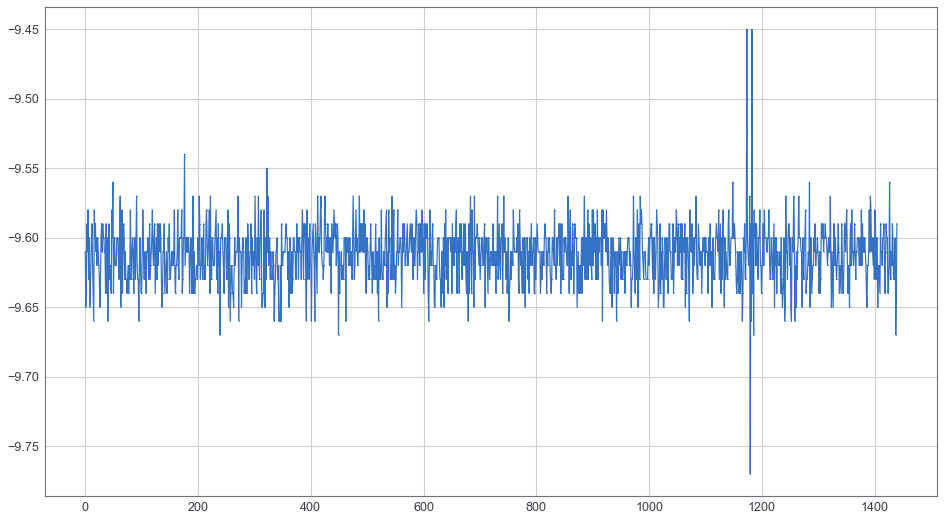

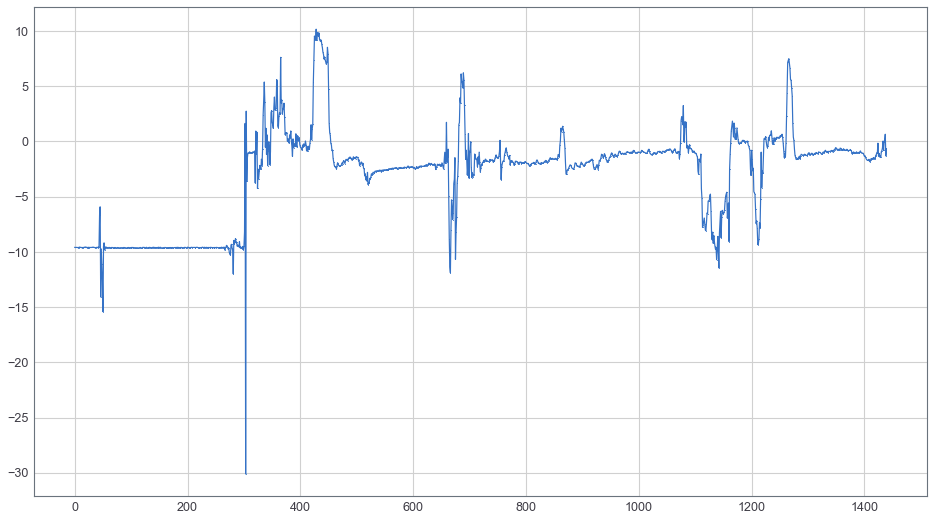

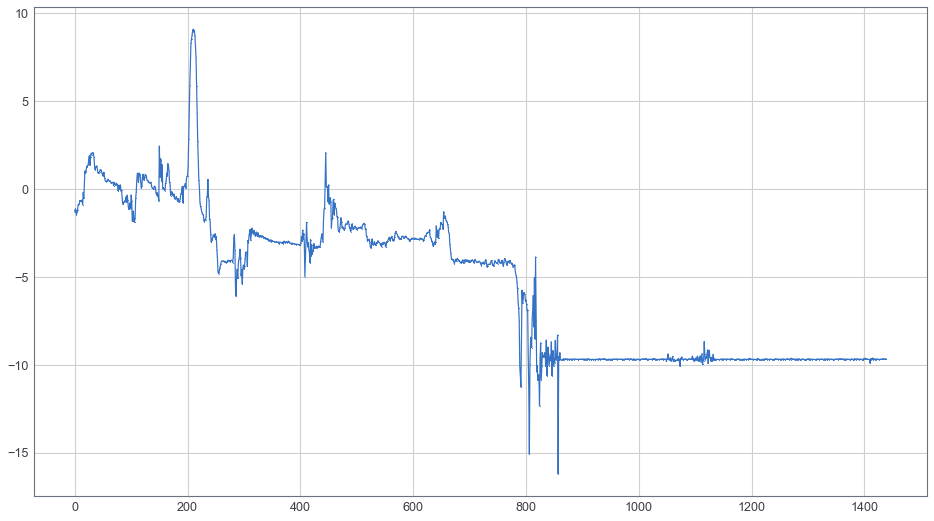

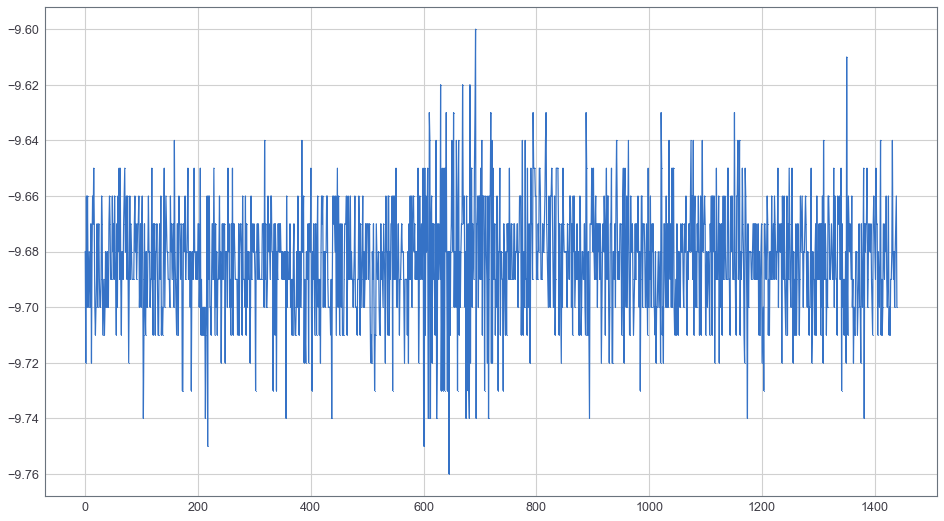

In [11]:
beauty_draw(df['accx'], 10)

## Data Vaildation

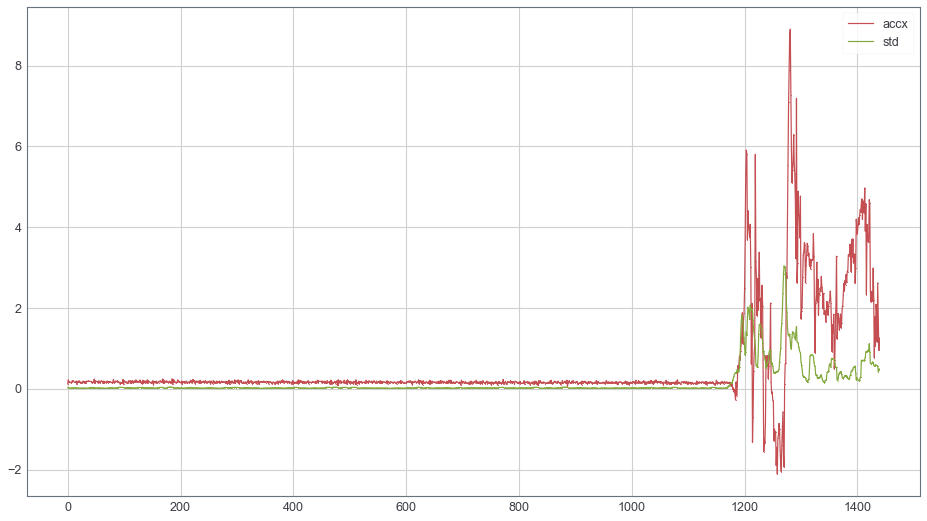

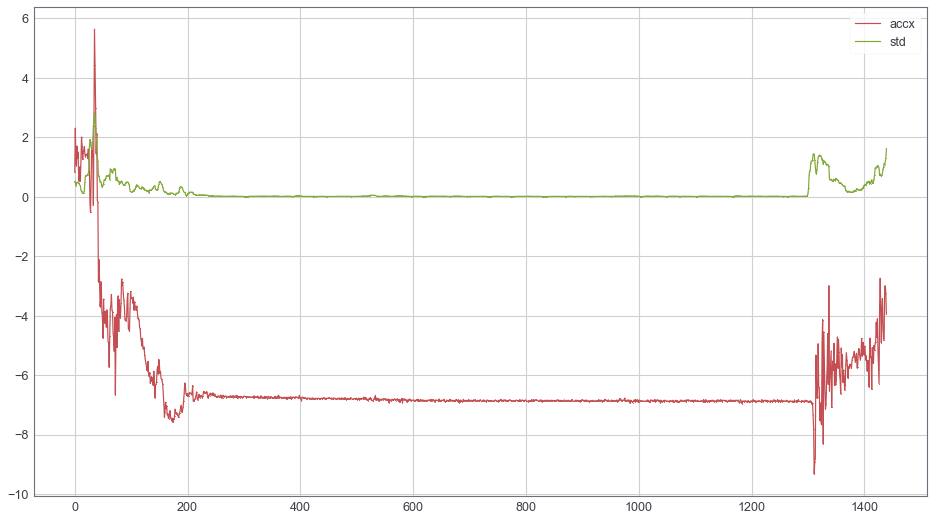

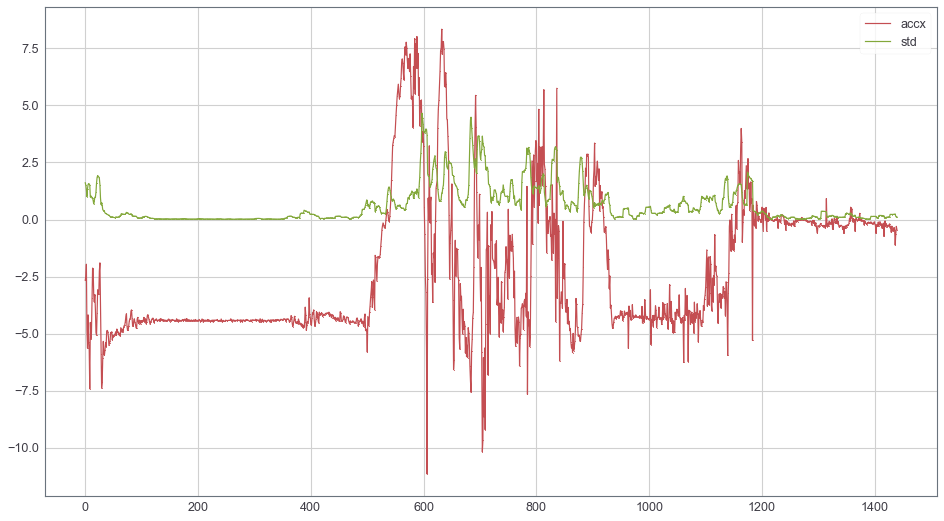

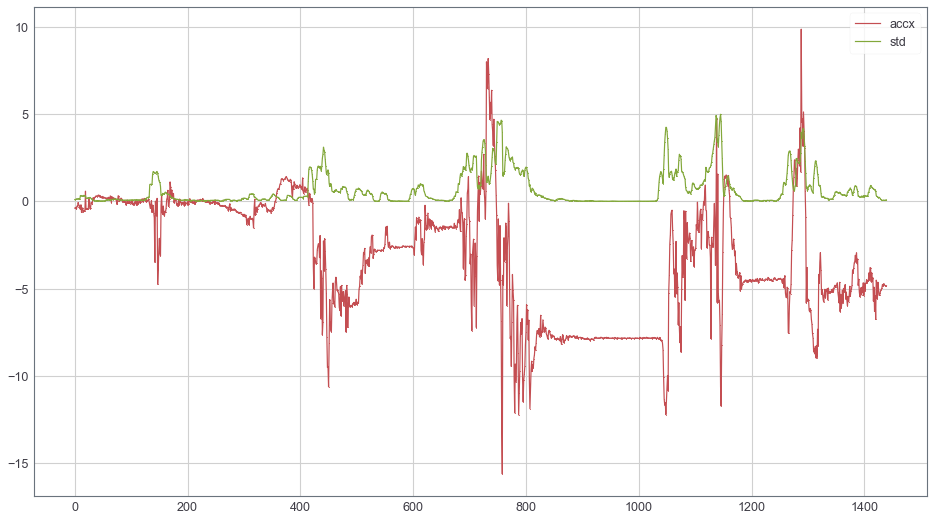

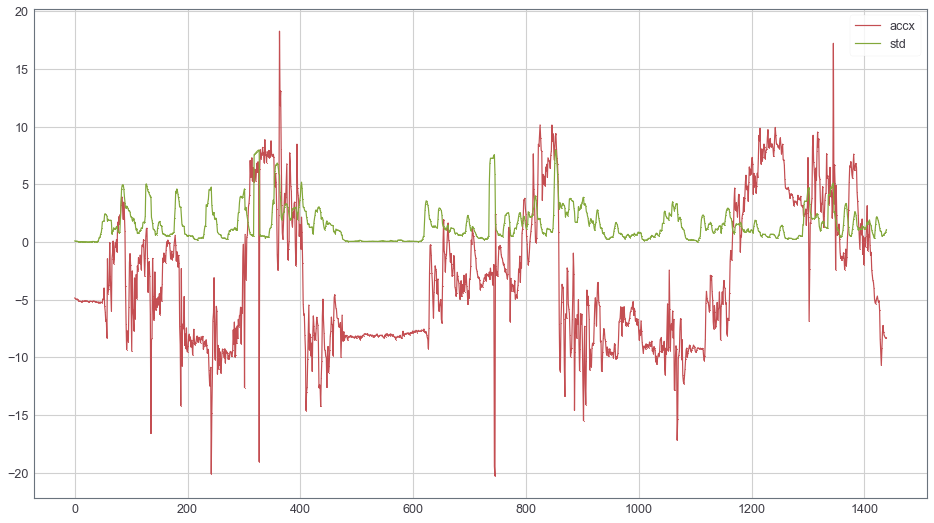

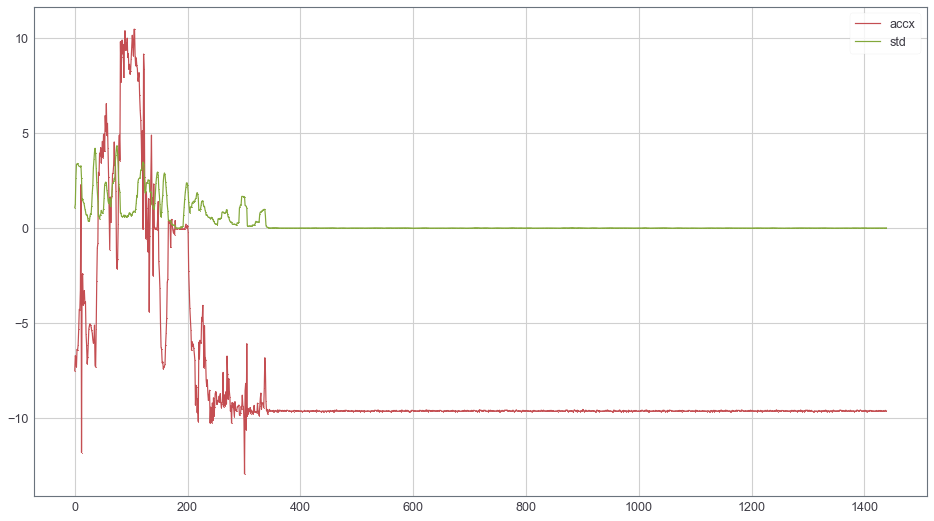

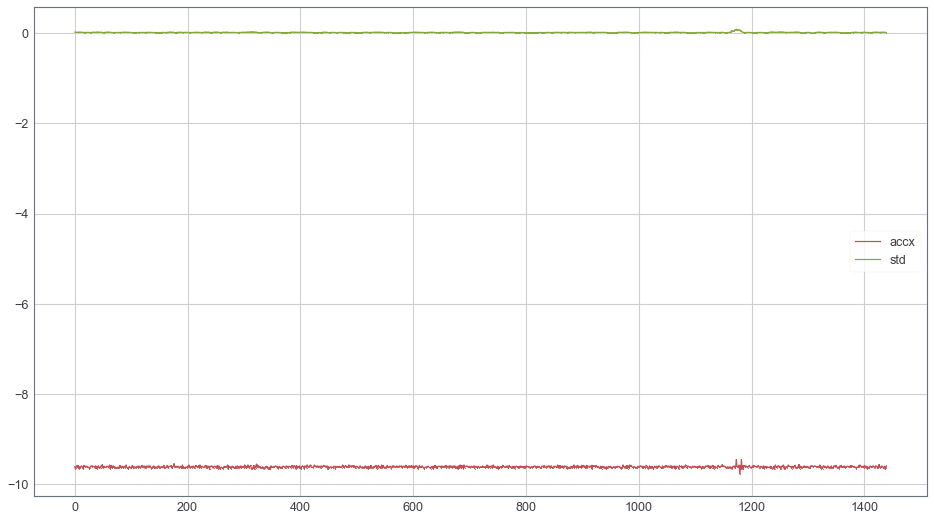

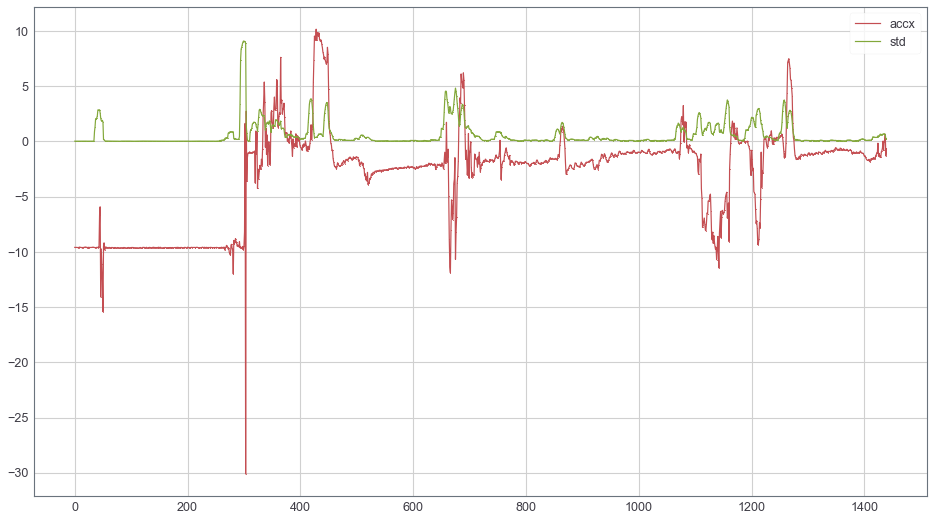

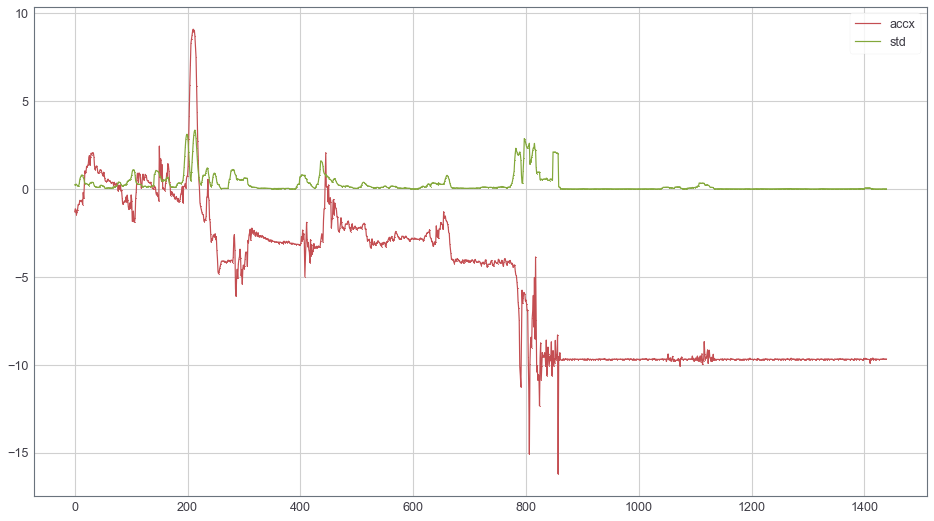

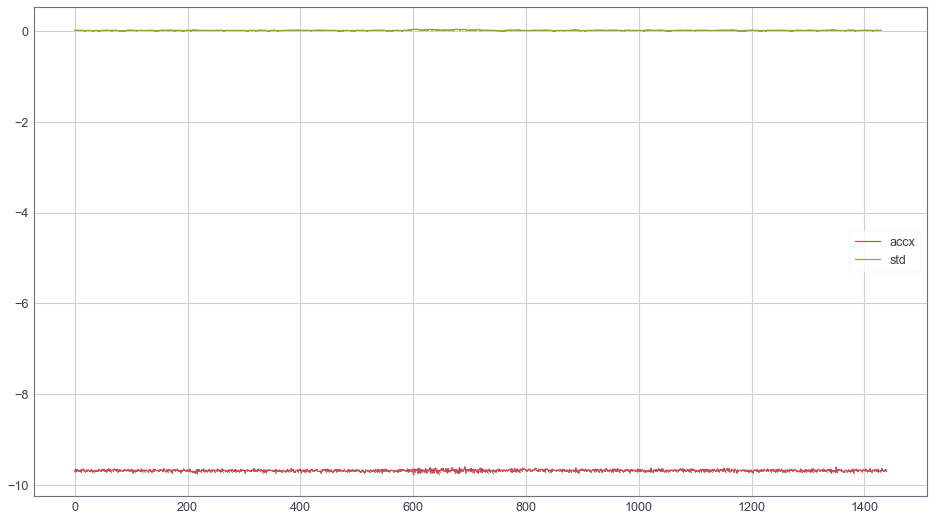

In [12]:
WINDOW = 10
for col in ['accx', 'accy', 'accz']:
    data = np.array(df[col])
    mins, maxes, stds = [], [], []
    for i in range(0, len(data)-10):
        temp = data[i:i+WINDOW]
        mins.append(min(temp))
        maxes.append(max(temp))
        stds.append(np.std(temp))
    pall_beauty_draw([data, stds], [col, 'std'], 10)
    break

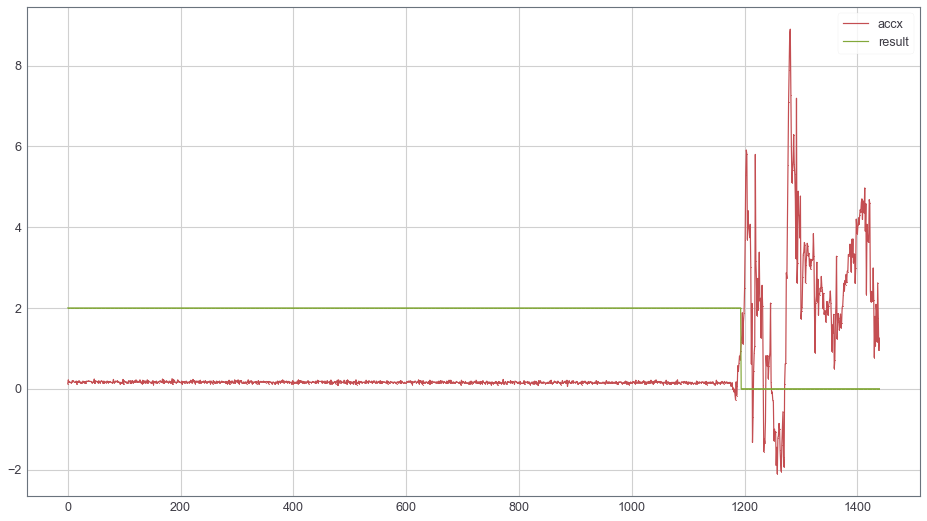

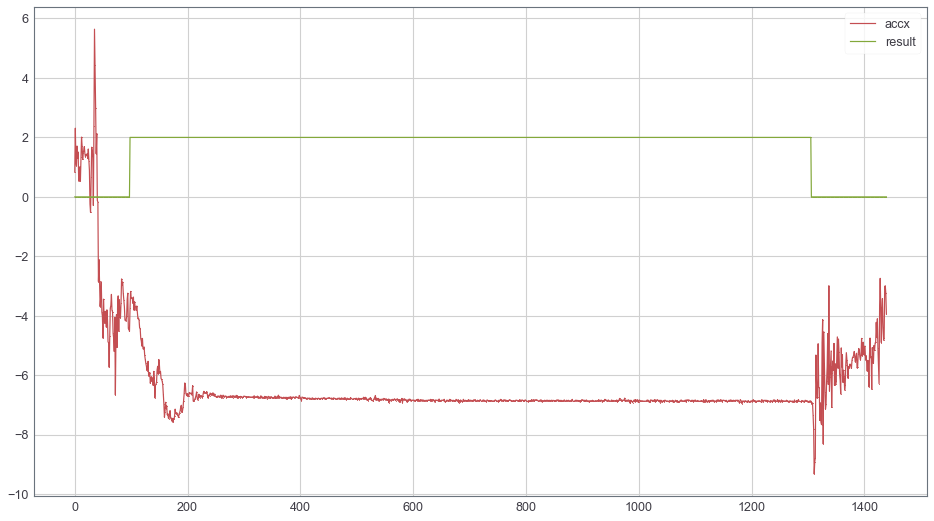

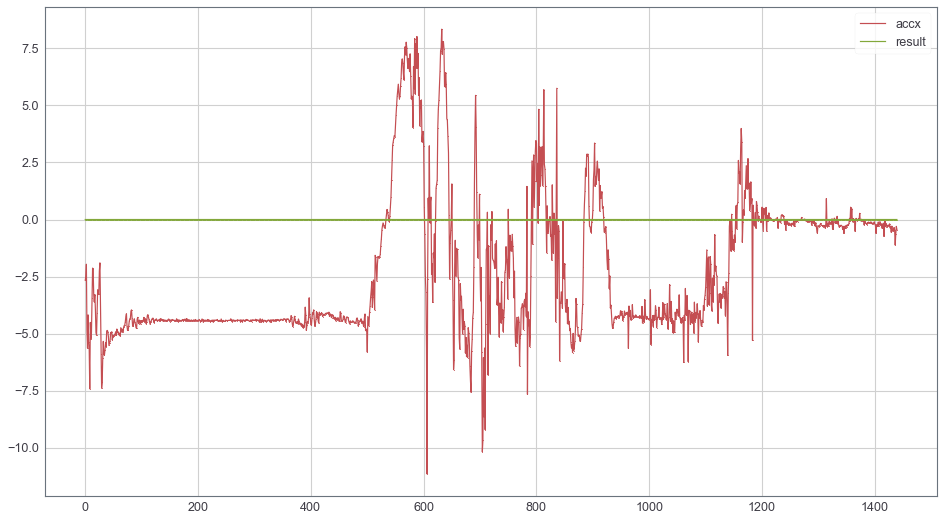

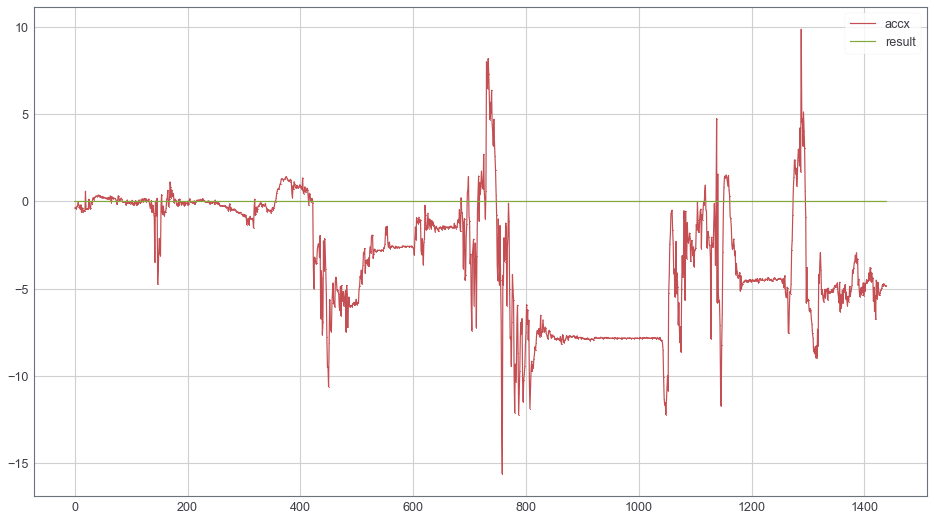

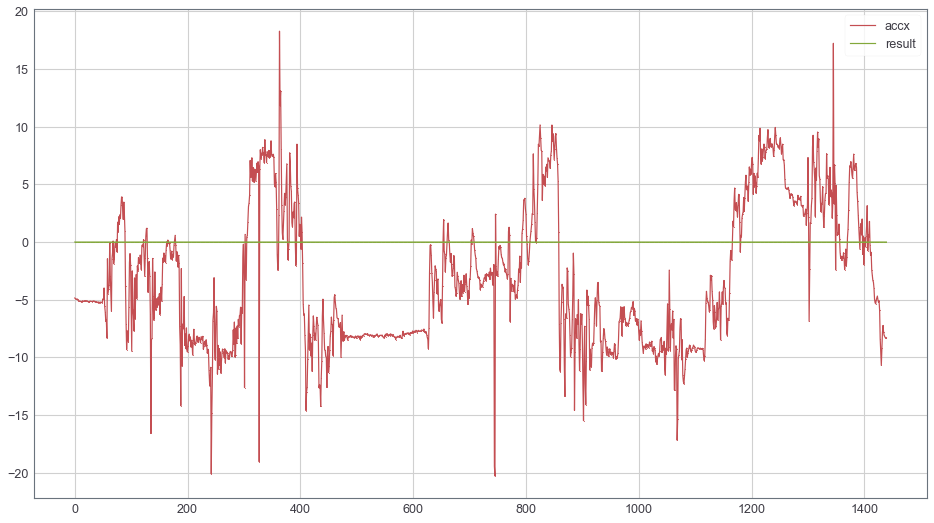

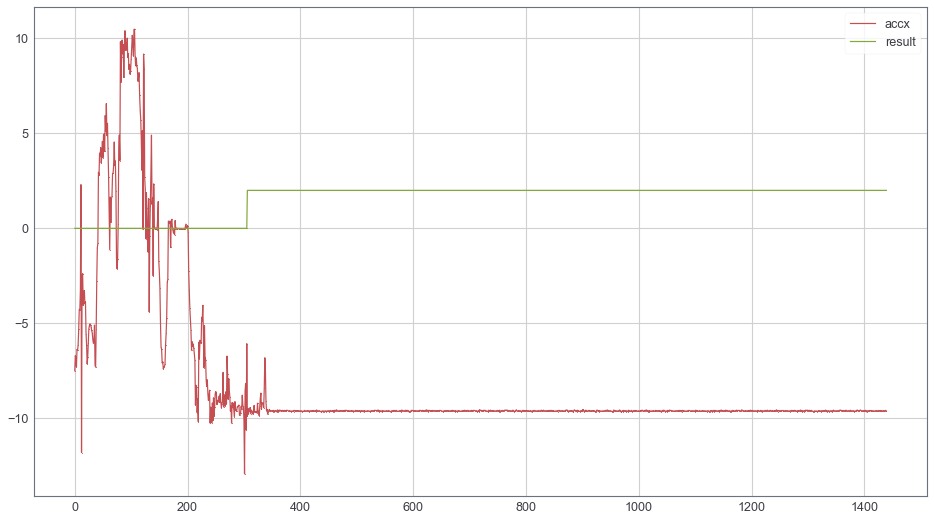

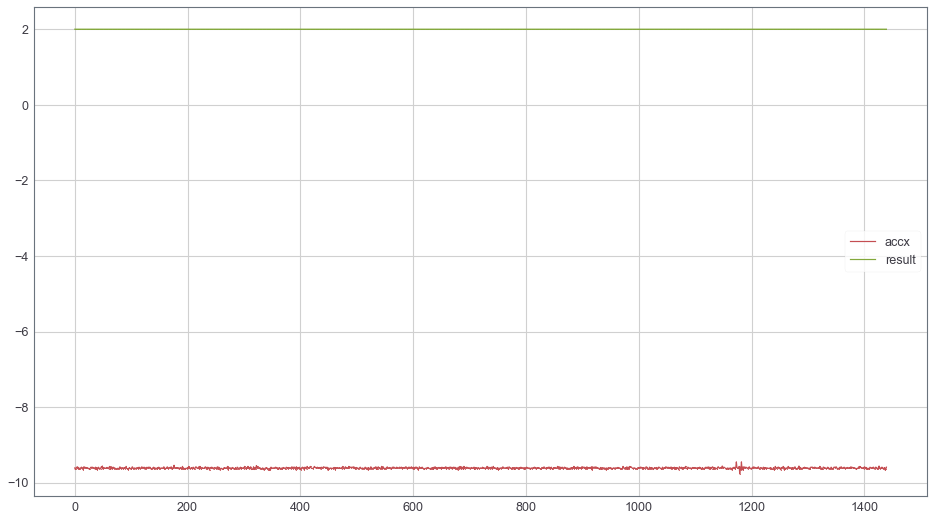

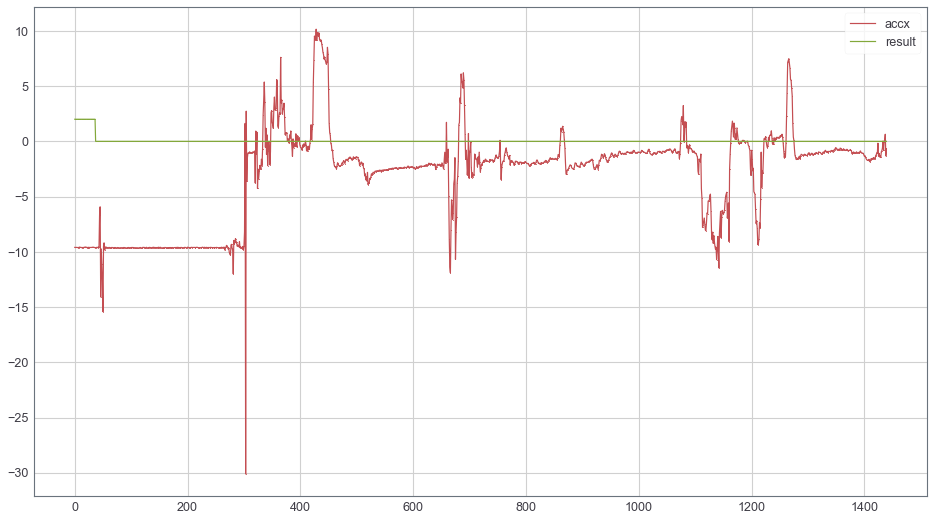

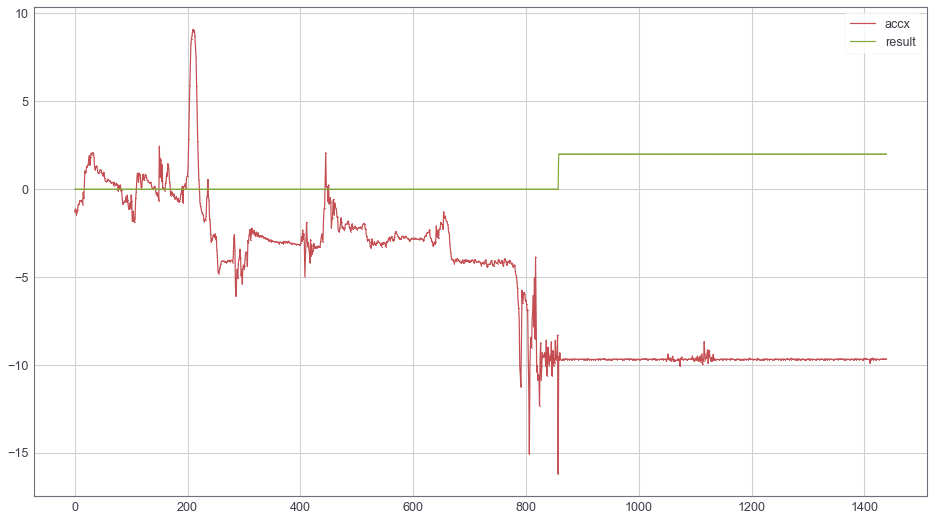

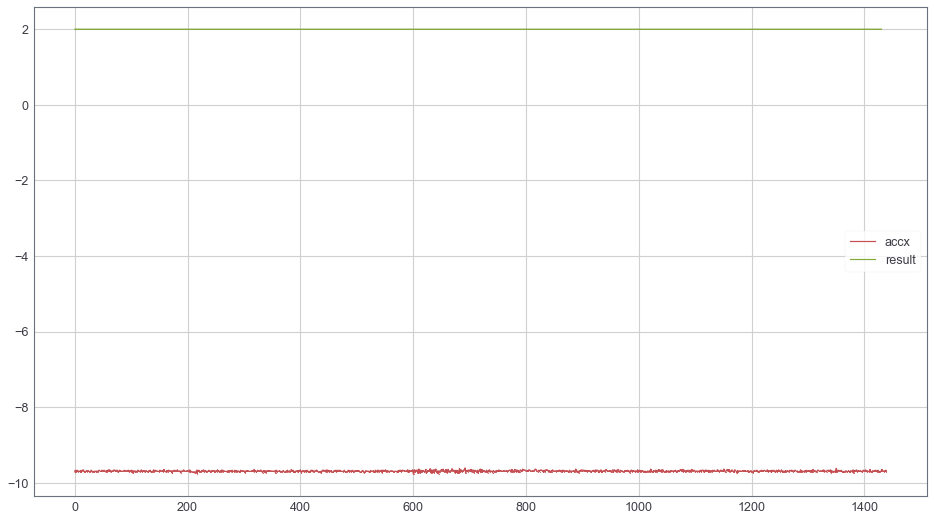

In [98]:
WINDOW = 10
for col in ['accx', 'accy', 'accz']:
    data = np.array(df[col])
    mins, maxes, stds, movs = [], [], [], []
    for i in range(0, len(data)-10):
        temp = data[i:i+WINDOW]
        mins.append(min(temp))
        maxes.append(max(temp))
        stds.append(np.std(temp))
    patiance = 600
    count = 0
    status = []
    flag = 0
    idx = 0
    threshold = 0.2
    while idx < len(stds):
        if stds[idx] < threshold:
            start = idx
            while stds[idx] < 1 and idx < len(stds) - 1:
                idx += 1
            if (idx - start) >= patiance:
                for i in range(start, idx + 1):
                    status.append(2)
            else:
                for i in range(start, idx + 1):
                    status.append(0)
        else:
            status.append(0)
        idx += 1
    pall_beauty_draw([data, status], [col, 'result'], 10)
    break

In [147]:
WINDOW = 10
TIMESTAMP = np.array(df['timestamp'])
for col in ['accx', 'accy', 'accz']:
    data = np.array(df[col])
    mins, maxes, stds, movs = [], [], [], []
    for i in range(0, len(data)-10):
        temp = data[i:i+WINDOW]
        mins.append(min(temp))
        maxes.append(max(temp))
        stds.append(np.std(temp))
    patiance = 600
    count = 0
    status = []
    flag = 0
    idx = 0
    threshold = 0.2
    while idx < len(stds):
        if stds[idx] < threshold:
            start = idx
            while stds[idx] < 1 and idx < len(stds) - 1:
                idx += 1
            if (idx - start) >= patiance:
                for i in range(start, idx + 1):
                    status.append(1)
            else:
                for i in range(start, idx + 1):
                    status.append(0)
        else:
            status.append(0)
        idx += 1
    chunks = []
    chunk = []
    for i in range(len(status)):
        if status[i] == 1:
            chunk.append((TIMESTAMP[i], data[i]))
        else:
            if len(chunk) == 0:
                pass
            else:
                chunks.append(chunk)
                chunk = []
    for i, c in enumerate(chunks):
        t, v = [j[0] for j in c], [j[1] for j in c]
        start = t[0]
        duration = t[-1] - t[0]
        _range = abs(max(v) - min(v))
        std = np.std(v)
        grads = []
        for j in range(len(v) - 1):
            grads.append(v[j + 1] - v[j])
        g_sum = sum([j ** 2 for j in grads])
        print(f"p{i} --> start: {datetime.fromtimestamp(t[0] / 1000)}, duration: {duration:0>6.0f}, range: {_range:0>4.3f}, std: {std:0>5.5f}, sum square of gradient: {g_sum:0>5.5f}")
    break

p0 --> start: 2020-01-22 01:48:28.827000, duration: 060843, range: 1.220, std: 0.05145, sum square of gradient: 2.75860
p1 --> start: 2020-01-22 01:49:47.275000, duration: 061595, range: 4.400, std: 0.44620, sum square of gradient: 6.66370
p2 --> start: 2020-01-22 01:54:51.763000, duration: 133240, range: 3.080, std: 0.08262, sum square of gradient: 12.01070
